In [2]:
import abacus_cosmos.Halos as ach
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
from collections import Counter
%matplotlib inline

In [3]:
def compute_skeleton_entropy_obs(beta=10.0):
    skel = "./LSS_BSK_calc"

    in_filename = "../data/SDSS/SDSS_data_Planck15.txt"
    out_filename = "beta_{:.1f}_SDSS_data_Planck15.txt".format(beta)
    beta_filename = os.path.join('xdl_beta_skeleton',out_filename+'.BSKIndex')

    print(out_filename)
    if not os.path.exists(beta_filename):
        cmd = "{} -input {} -output {} -beta {} -printinfo True -numNNB 300".format(skel, in_filename, out_filename, beta)
        print(cmd)
        os.system(cmd)
        
    data = np.loadtxt(in_filename)
    n_points = len(data)
    points_id = np.arange(n_points) # create ID for all points

    # Read beta skeleton data
    beta_data = np.loadtxt(beta_filename)

    # Flattend and count links
    beta_data = beta_data.flatten()
    beta_link_count = Counter(Counter(beta_data).values())

    # Count how many points have zero links
    unique_beta_id = len(set(beta_data))
    if (n_points - unique_beta_id)>0:
        beta_link_count[0] = n_points - unique_beta_id

    print(beta_link_count)

    assert np.sum(list(beta_link_count.values()))==n_points
    # compute probability array
    proba = []
    total_link = np.sum(list(beta_link_count.values()))
    for k in beta_link_count:
        #print(k, beta_link_count[k]/total_link)
        proba.append(beta_link_count[k]/total_link)
    proba = np.array(proba)
    print(proba, proba.sum())
    entropy = np.sum(-proba*np.log(proba))
    print('Entropy', entropy)
    return entropy

In [5]:
compute_skeleton_entropy_obs(beta=1.0)

beta_1.0_SDSS_data_Planck15.txt
./LSS_BSK_calc -input ../data/SDSS/SDSS_data_Planck15.txt -output beta_1.0_SDSS_data_Planck15.txt -beta 1.0 -printinfo True -numNNB 300
Counter({5: 16003, 4: 15310, 6: 12608, 3: 8751, 7: 8104, 8: 4647, 9: 2438, 2: 2196, 10: 1294, 0: 734, 11: 590, 12: 296, 13: 122, 1: 85, 14: 60, 15: 30, 16: 6, 17: 5, 18: 4, 19: 2, 20: 1})
[2.18363671e-01 2.08907568e-01 1.19408891e-01 1.15983953e-03
 1.72038316e-01 6.34091095e-02 1.10580466e-01 3.32669268e-02
 2.99647955e-02 8.05065087e-03 1.76568512e-02 1.66471086e-03
 4.03897061e-03 8.18710258e-04 4.09355129e-04 8.18710258e-05
 5.45806839e-05 2.72903419e-05 1.36451710e-05 6.82258549e-05
 1.00155555e-02] 1.0
Entropy 2.0610246206001204


2.0610246206001204

In [1]:
def compute_skeleton_entropy(beta=10.0, cut_id=0, cut_type='sphere'):
    skel = "./LSS_BSK_calc"

    in_filename = "../data/AbacusCosmos_1100box_00_FoF_halos_z0.300/cuts/{}_data_cut_{:d}.dat".format(cut_type, cut_id)
    out_filename = "beta_{:.1f}_{}_data_cut_{:d}.dat".format(beta, cut_type, cut_id)
    beta_filename = os.path.join('xdl_beta_skeleton',out_filename+'.BSKIndex')

    print(out_filename)
    if not os.path.exists(beta_filename):
        cmd = "{} -input {} -output {} -beta {} -printinfo True -numNNB 300".format(skel, in_filename, out_filename, beta)
        print(cmd)
        os.system(cmd)
        
    data = np.loadtxt(in_filename)
    n_points = len(data)
    points_id = np.arange(n_points) # create ID for all points

    # Read beta skeleton data
    beta_data = np.loadtxt(beta_filename)

    # Flattend and count links
    beta_data = beta_data.flatten()
    beta_link_count = Counter(Counter(beta_data).values())

    # Count how many points have zero links
    unique_beta_id = len(set(beta_data))
    if (n_points - unique_beta_id)>0:
        beta_link_count[0] = n_points - unique_beta_id

    print(beta_link_count)

    assert np.sum(list(beta_link_count.values()))==n_points
    # compute probability array
    proba = []
    total_link = np.sum(list(beta_link_count.values()))
    for k in beta_link_count:
        #print(k, beta_link_count[k]/total_link)
        proba.append(beta_link_count[k]/total_link)
    proba = np.array(proba)
    print(proba, proba.sum())
    entropy = np.sum(-proba*np.log(proba))
    print('Entropy', entropy)
    return entropy

In [12]:
sphere_entropy_values = {}
shell_entropy_values = {}
obs_entropy_values = {}
beta_values = np.array([1.0, 2.0, 3.0, 4.0])

for cut_id in range(10):
    sphere_entropy_values[cut_id] = np.zeros(len(beta_values))
    shell_entropy_values[cut_id] = np.zeros(len(beta_values))
    for i in range(len(beta_values)):
        sphere_entropy_values[cut_id][i] = compute_skeleton_entropy(beta=beta_values[i], cut_id=cut_id)
        shell_entropy_values[cut_id][i] = compute_skeleton_entropy(beta=beta_values[i], cut_id=cut_id, cut_type='shell')

obs_entropy_values[0] = np.zeros(len(beta_values))
for i in range(len(beta_values)):
    obs_entropy_values[0][i] = compute_skeleton_entropy_obs(beta=beta_values[i])


beta_1.0_sphere_data_cut_0.dat
Counter({5: 2248, 4: 2130, 6: 1680, 3: 1207, 7: 1057, 8: 622, 9: 345, 2: 275, 10: 197, 11: 105, 12: 60, 13: 29, 1: 13, 14: 9, 15: 7, 16: 2, 17: 2, 19: 1})
[1.68185004e-01 2.25047552e-01 1.05816398e-01 2.13234558e-01
 6.22684953e-02 1.20832916e-01 3.45379918e-02 2.75302833e-02
 1.05115627e-02 6.00660727e-03 1.97216939e-02 1.30143157e-03
 2.90319351e-03 2.00220242e-04 9.00991090e-04 7.00770848e-04
 1.00110121e-04 2.00220242e-04] 1.0
Entropy 2.043426574209458
beta_1.0_shell_data_cut_0.dat
Counter({4: 751, 3: 604, 5: 527, 6: 280, 2: 197, 7: 117, 8: 51, 1: 12, 9: 8, 10: 2, 12: 1})
[0.10980392 0.04588235 0.20666667 0.2945098  0.23686275 0.00313725
 0.0772549  0.02       0.00470588 0.00078431 0.00039216] 1.0000000000000002
Entropy 1.739017447293704
beta_2.0_sphere_data_cut_0.dat
Counter({3: 4180, 2: 4179, 4: 1084, 1: 475, 5: 71})
[0.41846031 0.04755231 0.10851937 0.4183602  0.00710782] 1.0
Entropy 1.1501184431852307
beta_2.0_shell_data_cut_0.dat
Counter({2: 1276

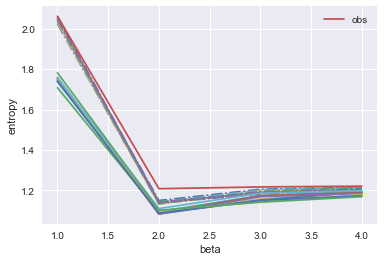

In [13]:
for i in range(10):
    plt.plot(beta_values, sphere_entropy_values[i], linestyle='-.')#, label=str(i)+' sphere', linestyle='-.')
for i in range(10):
    plt.plot(beta_values, shell_entropy_values[i])#, label=str(i)+' shell')
plt.plot(beta_values, obs_entropy_values[0], label='obs')
plt.xlabel('beta')
plt.ylabel('entropy')
plt.legend()

No handles with labels found to put in legend.


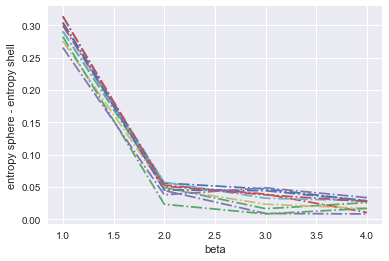

In [14]:
for i in range(10):
    plt.plot(beta_values, sphere_entropy_values[i]-shell_entropy_values[i], linestyle='-.')#, label=str(i)+' sphere', linestyle='-.')

plt.xlabel('beta')
plt.ylabel('entropy sphere - entropy shell')
plt.legend()

In [15]:
obs_entropy_values[0]

array([2.06102462, 1.20853985, 1.21731149, 1.22102846])